In [38]:
import pandas as pd
import re
import nltk

In [1]:
from repository import nerds_viajantes

In [9]:
published = nerds_viajantes.read_published()

In [16]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [ ]:
def preprocess_text(text):
    no_html = remove_html_tags(text)
    preprocessed = no_html
    return preprocess_text

In [22]:
published['content_clean'] = published['content'].apply(lambda x: remove_html_tags(x))

In [18]:
"""
A list of stopwords can be found in the corpus module of nltk package. We are going to try to use the portuguese version. The download code is necessary only once.
"""
from nltk.corpus import stopwords

# import nltk
# nltk.download('stopwords')

from nltk.tokenize import word_tokenize

In [24]:
pt_stopwords = stopwords.words('portuguese')

In [26]:
def remove_stopwords(text, pt_stopwords):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in pt_stopwords]
    return " ".join(tokens_without_sw)

In [30]:
published['content_clean'] = published['content_clean'].apply(lambda x: remove_stopwords(x, pt_stopwords))

In [31]:
"""
Remover caption de imagens
"""
def remover_caption(text):
    clean = re.compile('\[.*caption.*\]')
    return re.sub(clean, '', text)

In [33]:
published['content_clean'] = published['content_clean'].apply(lambda x: remover_caption(x))

In [34]:
published['content_clean'][1000]

'Uma trilhas fizemos El Chaltén , Patagônia Argentina , Laguna Torre busca conhecer lagoa Cerro Torre . Fizemos trilha primeira viagem El Chaltén 2013 porém conseguimos ver Cerro Torre , encoberto nuvens . Em 2014 , retornamos região , tentamos novamente trilha duas vezes novamente vimos Cerro Torre . De qualquer forma , trilha bonita compensa . A distância trilha aproximadamente 18 quilômetros ( ida volta ) . O início trilha duas possibilidades caminho . Na dúvida , voltamos outro . Depois subir pouco , chegamos Mirador Cerro Torre . Nesse lugar vista cadeia montanhas , incluindo famoso Cerro Torre , variar escondido . Depois parada observação paisagem , descemos trilha chegar área plana , muitas árvores secas . Depois passamos floresta chegamos próximos rio . Seguimos caminho rio área subida muitas pedras , trecho final chegar lagoa . A paisagem Laguna Torre encantadora . No dia visitamos havia vento arrastava pedaços gelo glaciar perto margem . Para animados , possível caminhar pouc

In [36]:
from collect.clean_text import stemm_text

In [39]:
stemmer = nltk.stem.RSLPStemmer()

In [40]:
def stemm_text2(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

In [44]:
published['content_clean'] = published['content_clean'].apply(lambda x: stemm_text2(x))

In [46]:
cerro_torre = published['content_clean'][1000]
cerro_torre

'uma trilh fiz el chaltén , patagôn argentin , lagun torr busc conhec lago cerr torr . fiz trilh prim viag el chaltén 2013 porém consegu ver cerr torr , encobert nuv . em 2014 , retorn reg , tent nov trilh dua vez nov vim cerr torr . de qualqu form , trilh bonit compens . a dist trilh aproximad 18 quilômetr ( ida volt ) . o iníci trilh dua possibil caminh . na dúv , volt outr . depois sub pouc , cheg mir cerr torr . ness lug vist cade montanh , inclu fam cerr torr , vari escond . depois par observ pais , desc trilh cheg áre plan , muit árvor sec . depois pass florest cheg próx rio . segu caminh rio áre sub muit pedr , trech final cheg lago . a pais lagun torr encant . no dia visit hav vent arrast pedaç gel glaci pert marg . par anim , possível caminh pouc cheg mir maestr , lind vist reg . lei : patagôn - rot el chaltén - trilh lagun lo tre el chaltén - trilh lom del plieg tumb víde - episódi lagun lo tre qu assist víde trilh lagun torr ? se quis ver detalh trilh , assist víde segu . ap

In [53]:
# Junta todos os tokens de todos os posts
values = published['content_clean'].values
values_tk = [word_tokenize(t) for t in values]
all_values = [token for content_tokens in values_tk for token in content_tokens]

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
# Brincando com distribuição de frequencia
fd = nltk.FreqDist(all_values)
fd

FreqDist({'.': 5253, ',': 4609, ':': 2277, ')': 1430, '-': 1361, '!': 1290, 'fot': 1232, '(': 1112, 'download': 744, 'o': 535, ...})

In [63]:
tudo = " ".join(all_values)

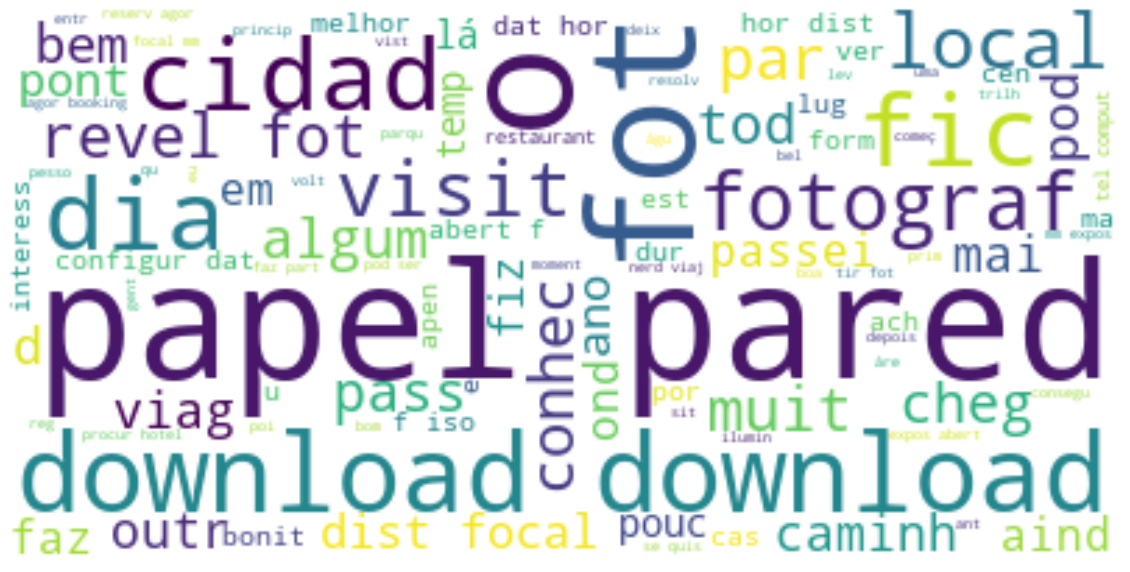

In [67]:
# Visualizacao de wordcloud para todas as palavras de todos os posts do blog
wordcloud = WordCloud(max_words=100, background_color='white').generate(tudo)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()